<h1><center>Krishna Mohan Shah, Mohamed Radwan, Talha Naveed, Hai Phong Nguyen</center></h1>

# Summary

In this study, models were built to predict the final grade in for
students in mathematics class (G3) of Portuguese secondary school pupils
based on some variables (i.e. pupils demographics, pupils activities
at school and at home..etc.). Feature selection techniques were used to
identify the best features to predict the target variable like
sequential forward selection, sequential backward selection and select
KBest. Regression methods like Linear Regression, Partial Least Square
(PLS), Ridge Regression, Lasso Regression, Elastic Net and Random Forest
Regression were used to predict the grade of the students. Random Forest
gives the best \(R^2\) score which is 0.87 on the test data. The data
holds valuable information, such as trends and patterns, which can be
used to improve decision-making. Hence, automated tools were deployed to
analyze the raw data and extract interesting high-level information for
decision making.

# Introduction

Education is one of the most important investments, which a country must
do for its future development. Education management is important to
improve the education system and there is increasing demands for good
support tools to manage the pupils' study. The application of Machine
Learning (ML) may be a tool, which can help countries to manage their
education systems. The dataset used in this report consisted of 33
variables and 395 instances (observations) and was retrieved from the
website of University of California Irvine Machine Learning Repository. A description of variables is presented in appendix 1.

Portuguese education system was ranked in Top 20 education system in the
third quarter, 2013. This data was also studied and published by Cotez
\& Silva, 2008. The variables of the dataset give a good insight of the
student's personal and academic life. The dataset consists of scores for
three periods of study that were represented by G1, G2 and G3. The
target was to come up with a model that predicts the score of the G3
(The final period) based on the scores of the first two periods i.e.~G1
and G2 and other variables that were provided in the dataset.

# Methods

The raw data set was in csv format. We started with data visualisation
using matplotlib, pandas and seaborn libraries. Null data was checked
and histograms, correlation matrix, box-plot of numerical features were
built (Fig. 1,2,3). Data was scaled by applying library using
scikit-learn.

Different feature selection techniques used in this report were
Sequential Forward Selection, Backward Selection and Select K Best.
Mlextend library was used for sequential features selection. Sequential
feature selection algorithms are greedy search algorithms. It's used to
select a subset of features that is most relevant to the problem and
removing irrelevant features or noise. The usage of features selection
is important in this case study to remove the noises which leads to
better prediction and to reduce the computation cost.

KBest feature selection method takes two arguments (f-regression and
number of features to be selected). The idea behind f-regression in this
context is that it uses f-score metric to tell if there is a regression
relationship between each of features and the target. Select KBest
technique proved to be the best features selection technique in this
case study.
Multiple regression methods were used to come up with a model that was
best suited to predict the target variable (G3). The regression methods
used were Linear regression, Partial Least Square (PLS) regression,
Ridge regression, Lasso regression, Elastic Net and Random Forest
Regression. All regressions implemented in this paper were using
scikit-learn library.

Linear regression is best-fitting line through the training examples.
Ordinary least squares (OLS) or Linear least squares method is to to
estimate the coefficients of the regression line that minimizes the sum
of the squared residuals or errors to the training data points. Partial
Least Squares takes into account the decomposition of original variables
into latent variables that describes the maximum variances.

Another family of regressions are the regularisation regressions (Ridge
regression, Lasso, and elastic Net). Those methods are usually used to
handle over-fitting by adding additional penalty term against complexity
of the model which shrinks the parameter values of the model. The loss
function will be sum of squared residuals of OLS equation plus the
penalty term which is governed by the hyper-parameter lambda as shown
the following equations.

$L_{ridge} = \sum\limits_{i=1}^n (y_i - a*x_i) + \lambda* \sum\limits_{j=1}^m (a_j)^2$

$L_{lasso} = \sum\limits_{i=1}^n (y_i - a*x_i) + \lambda* \sum\limits_{j=1}^m|a_j|$

$L_{elasticnet} = \sum\limits_{i=1}^n (y_i - a*x_i) + \lambda_1* \sum\limits_{j=1}^m*|a_j| + \lambda_2* \sum\limits_{j=1}^m*(a_j)^2$

While $a$ is the slope of the line, $n$ is number of training examples and $m$ is number of features. Ridge and Lasso use square and absolute value of the slope respectively. Elastic Net is just a combination of both penalities (Lasso and Ridge) in one loss function. 


Another robust regression algorithms are decision tree. Decision tree
splits its nodes until the leaves are pure which is defined by entropy
as a measure of impurity. The impurity is what determine which feature
split that maximizes the information gain. Combination or ensemble of
several random decision trees gives better generalization performance
and more robust model than an individual decision tree which is called
"Random Forest".

Using these methods, It was not possible in this study to train all
regression models on all kinds of selected features data. So, we train
the regression models only on the data that gives the best validation
score as shown in the results. For example, Lasso regression was only
trained on forward selected features as it gives higher score and
consider that score as the best score that Lasso regression will achieve
in this case study. Grid Search was used only to optimize the best
performing model which is the random forest in this study to save computational cost. Grid search is used to estimate the number of decision trees or estimators to be used.


## Used Libraries
- Pandas
- Numpy
- Matplotlib
- Seaborn
- Scikit-Learn
- mlxtend

# Results

### Reading the data

In [170]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [171]:
data = pd.read_csv('arranged_mathData.csv')

In [172]:
data.shape

(395, 33)

In [173]:
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [174]:
data.Fjob.unique()

array(['teacher', 'other', 'services', 'health', 'at_home'], dtype=object)

#### Columns Names

The following pandas index shows all the columns names in the dataset 

In [175]:
data.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

#### Checking if there is any data is null

In [176]:
data.isnull().values.any()

False

#### Statistics of raw data

In [177]:
data.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


#### Histogram of the raw data
Figure 1 shows the histogram of the raw numeric data. Categorical
features like Fjob and Mjob are not shown here and that will be encoded
later. From the figure 1 , the numeric data is relatively skewed.

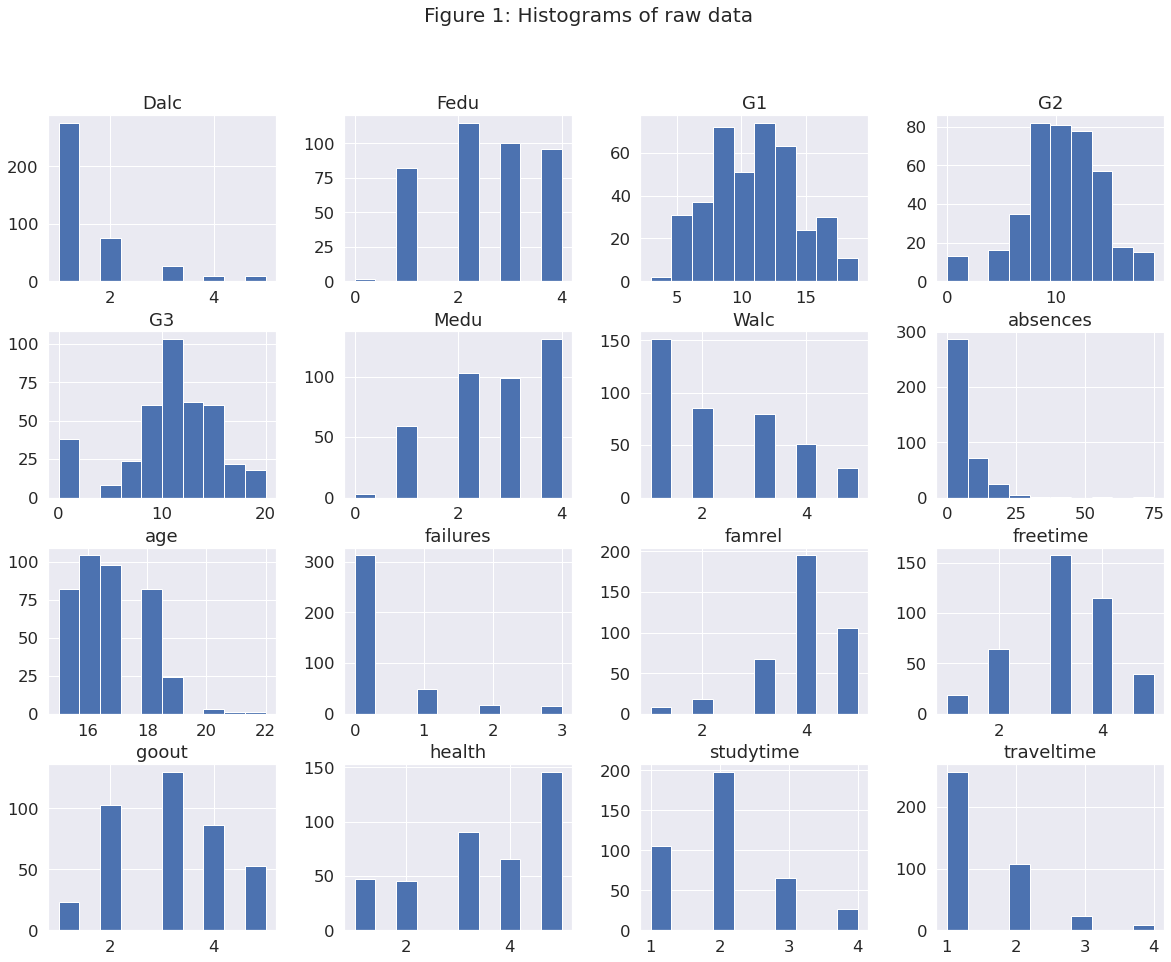

In [178]:
sns.set(font_scale=1.5) 
data.hist(figsize=(20, 15))
plt.suptitle('Figure 1: Histograms of raw data', fontsize=20)
plt.show()

#### Correlation matrix for all the features on raw data

Correlation matrix (Figure 2) was use to get overview patterns between
the raw data features, It's obvious that G3 is highly correlated with G1
and G2 features.

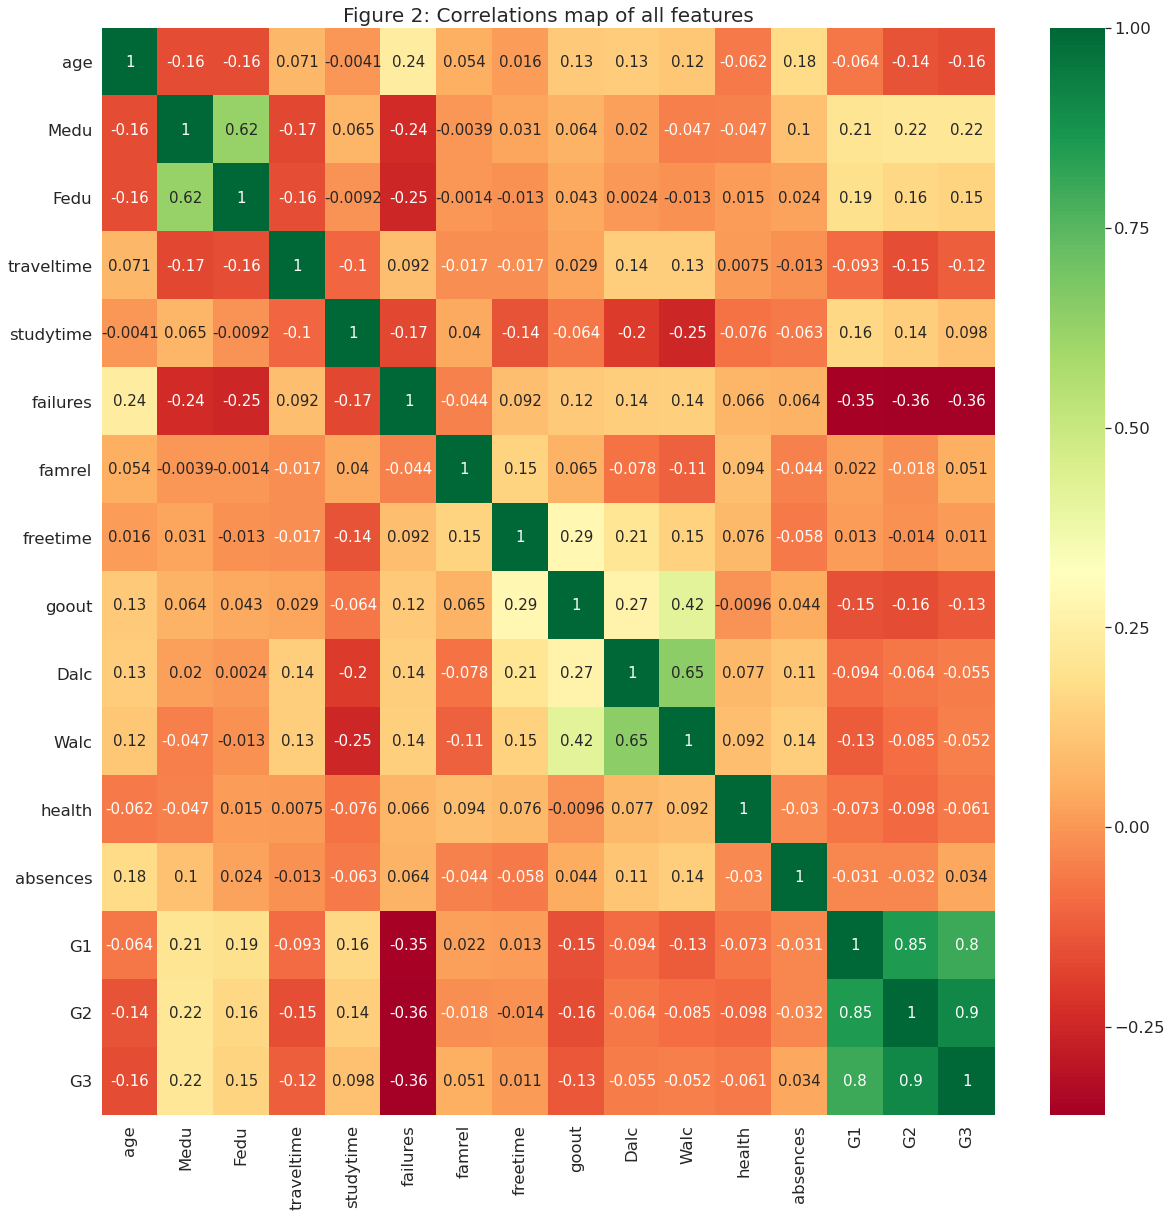

In [179]:
#get correlations of each features in dataset
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
plt.title('Figure 2: Correlations map of all features', fontsize=20)
#plot heat map
g = sns.heatmap(data[top_corr_features].corr(),
                annot=True,
                cmap="RdYlGn", 
                annot_kws={"size": 15})

#### Box Plot of raw data

Box plot (Figure 3) displays the data quartiles is used to watch the data outliers, absenses features shows values outside the interquartile range. However, the outliers were not removed from the data because it still gives $r^2$ score of more than 0.8 for most regression algorithms as will be shown later in the report.

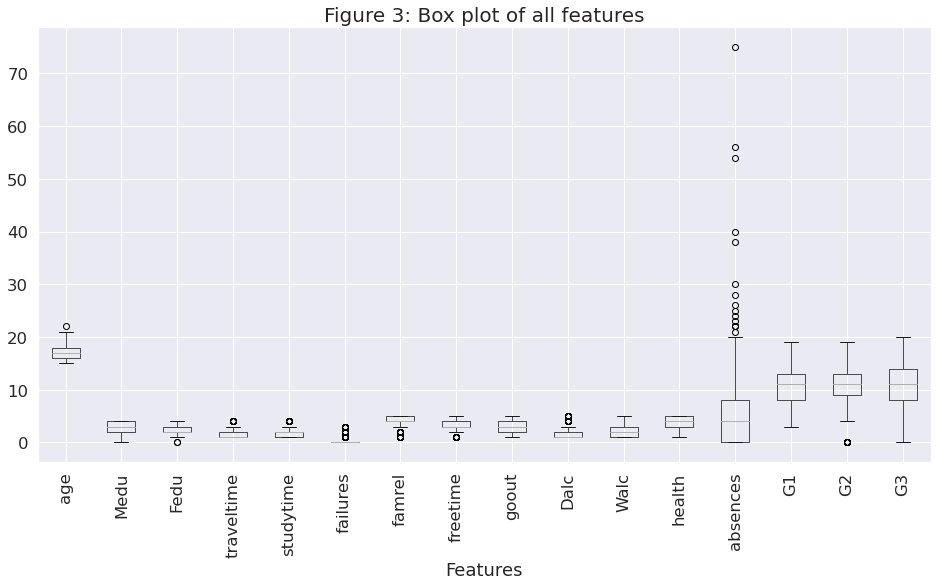

In [180]:
plt.figure(figsize=(16,8))
plt.xlabel('Features')
plt.title('Figure 3: Box plot of all features', fontsize=20)
data.boxplot()
plt.xticks(rotation='vertical')
plt.show()

In [181]:
# this dictionary is used to save the R2 scores from all regressions
saved_results_r2 = {}

### Conversion of categorical features into dummy variables

Through data analysis, we noticed that the dataset includes 13 binary features (i.e. sex, internet) that were converted into zeros and ones for simplification of the data. Other features that include more than 2 unique values like Mjob used one-hot-encoding. One-hot-encoding will assign a numeric value to categorical features. For example, Fjob features has 5 unique values, Those values are teacher, other, services, health and at_home. The value 'teacher' will be encoded as [1, 0, 0, 0, 0] while the value 'other' is encoded as [0, 1, 0, 0, 0]. The newly converted data matrix  now has 46 columns.  

In [182]:
#Dumify Bool Values and Take only One Column For them 
dummy_data =pd.get_dummies(data,columns=['school', 'sex', 'address', 'famsize', 
                                      'Pstatus','schoolsup','famsup', 'paid', 
                                      'activities','nursery', 'higher', 'internet', 
                                      'romantic'],drop_first=True) 
#Dumify Categorical Values 
dummy_data =pd.get_dummies(dummy_data,columns=['Mjob', 'Fjob', 'reason', 'guardian'])

In [183]:
dummy_data.shape

(395, 46)

### Columns names:

The following pandas index shows all the columns names in the dataset after converting the raw catgorical variables into dummy variables

In [184]:
dummy_data.columns

Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2',
       'G3', 'school_MS', 'sex_M', 'address_U', 'famsize_LE3', 'Pstatus_T',
       'schoolsup_yes', 'famsup_yes', 'paid_yes', 'activities_yes',
       'nursery_yes', 'higher_yes', 'internet_yes', 'romantic_yes',
       'Mjob_at_home', 'Mjob_health', 'Mjob_other', 'Mjob_services',
       'Mjob_teacher', 'Fjob_at_home', 'Fjob_health', 'Fjob_other',
       'Fjob_services', 'Fjob_teacher', 'reason_course', 'reason_home',
       'reason_other', 'reason_reputation', 'guardian_father',
       'guardian_mother', 'guardian_other'],
      dtype='object')

## Splitting the data matrix into variables matrix and output vector

The target variable (y) is set to be the column G3, all other columns are considered as the X matrix. As explained in the data, The target variable G3 has a strong correlation with G2 and G1. It was not possible to predict G3 without G2 and G1.

In [185]:
X = dummy_data.loc[:, dummy_data.columns != 'G3']
y = dummy_data['G3']

In [186]:
X.shape, y.shape

((395, 45), (395,))

## Train Test Split

The data has 395 obsevations, and was split the data with 70% train and 30%.

In [187]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

## Standardization

Standardization the data prior to Principal Components Analysis (PCA) so to make the other components
contribute in variance. The reason for this is because PCA seeks to
maximize the variance of each component. The training data is used to
fit the scaler object and the use the parameters of scaling from train
data to scale the test data as follows.

In [247]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

## Principal Components Analysis (PCA)

The matrix X contains 45 columns, so we build instance of the PCA object
with 45 components to estimate the explained variance for each
component. from the graph, we noticed that the curve flattens at 40
components, which means that 40 components would be enough to explain
the variance in the data. However, we didn't use PCA in the modeling, we
run the modeling and feature selection on the original standardized data
because the original data tends to gives higher scores.

In [189]:
from sklearn.decomposition import PCA
pca = PCA(n_components=45)
pca.fit(X_train_std)
cum_var = pca.explained_variance_ratio_.cumsum()

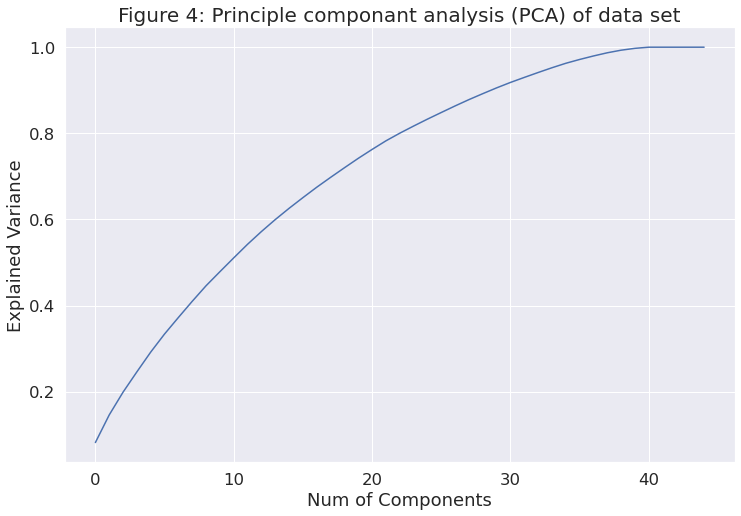

In [190]:
plt.figure(figsize=(12,8))
plt.plot(cum_var)
plt.xlabel('Num of Components')
plt.ylabel('Explained Variance')
plt.title('Figure 4: Principle componant analysis (PCA) of data set', fontsize=20)
plt.show()

## Sequential Feature Selection

### Forward Sequential Feature Selection

Mlextend library is used in sequential feature selection. It was decided to stick to only 21 features, after 21 features, the $R^2$ score declines again (fig. 5), The calculation was done using linear regression.

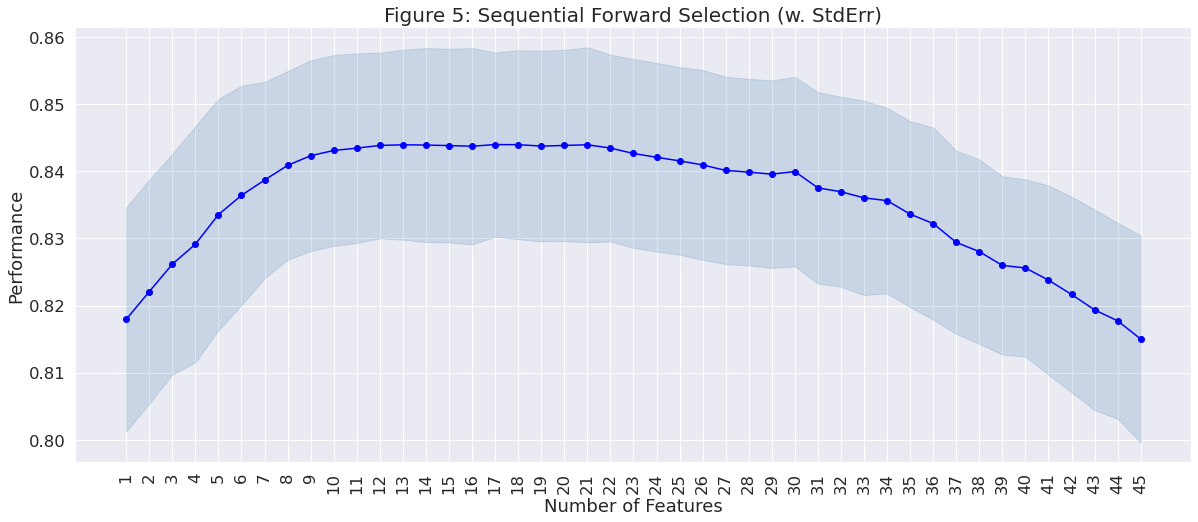

In [191]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
from sklearn.linear_model import LinearRegression

# build linear regression
lr = LinearRegression()

# Initialise Sequential Feature Selector
sfs1 = SFS(lr, 
           k_features=45, 
           forward=True, 
           floating=False, 
           verbose=0,
           scoring='r2',
           cv=10)

# Fit models
sfs1 = sfs1.fit(X_train_std, y_train)

# This dictionary contains results from all compuations
metric_dict = sfs1.get_metric_dict()

# Get indices of best features
k_ind = sfs1.k_feature_idx_

# Get names of best features using numpy arrays
feature_names = X.columns

# Plot the score vs the feature index
fig = plot_sfs(metric_dict, kind='std_err', figsize=(20, 8))
plt.title('Figure 5: Sequential Forward Selection (w. StdErr)', fontsize=20)
plt.xticks(rotation='vertical')
plt.show()

By the following, we take only the 21 features that are only need from the train data .

In [192]:
# Initialise Sequential Feature Selector
sfs1 = SFS(lr, 
           k_features=21, 
           forward=True, 
           floating=False, 
           verbose=0,
           scoring='r2',
           cv=10)

# Fit models
sfs1 = sfs1.fit(X_train_std, y_train)

# This dictionary contains results from all compuations
metric_dict = sfs1.get_metric_dict()

# Get indices of best features
k_ind = sfs1.k_feature_idx_

# Get names of best features using numpy arrays
feature_names = X.columns

The next cell is a list of the features names of selected features based on forward sequential selection

In [193]:
forward_selected_features_names = [dummy_data.columns[col] for col in k_ind]
print('Forward selected features names', forward_selected_features_names)

Forward selected features names ['age', 'famrel', 'goout', 'Dalc', 'absences', 'G1', 'G2', 'school_MS', 'Pstatus_T', 'schoolsup_yes', 'famsup_yes', 'paid_yes', 'higher_yes', 'internet_yes', 'Mjob_teacher', 'Fjob_other', 'Fjob_teacher', 'reason_course', 'reason_home', 'reason_other', 'guardian_father']


In [194]:
X_test_forward_selected_features = X_test_std[:, k_ind]
X_train_forward_selected_features = X_train_std[:, k_ind]

### Backward Features Selection

In backward selection features, 10 features gives optimal scores (fig. 6).

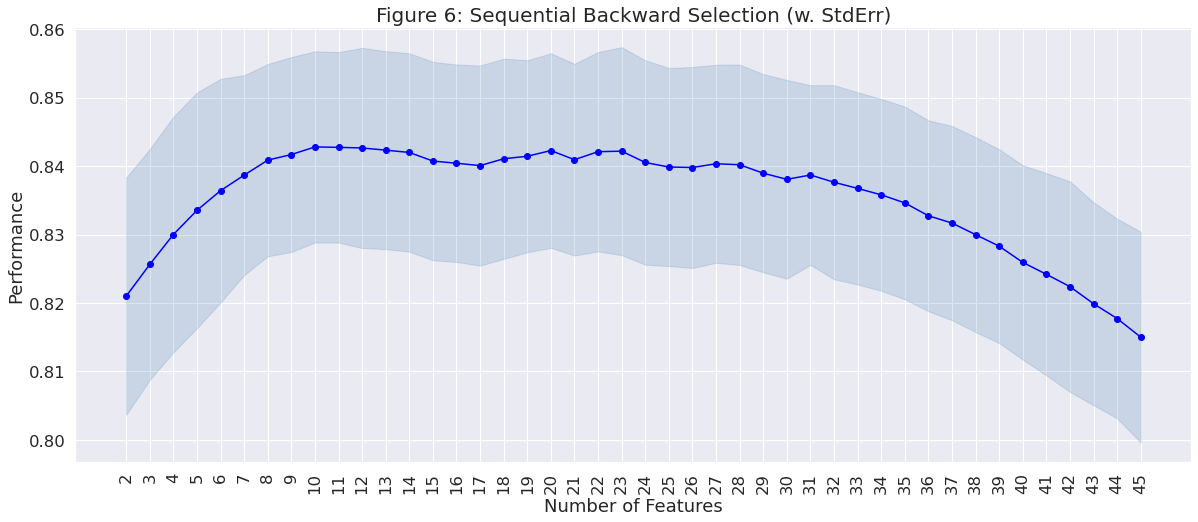

In [195]:
# build linear regression
lr = LinearRegression()

# Initialise Sequential Feature Selector
sfs1 = SFS(lr, 
           k_features=(2,45), 
           forward=False, 
           floating=False, 
           verbose=0,
           scoring='r2',
           cv=10)

# Fit models
sfs1 = sfs1.fit(X_train_std, y_train)

# This dictionary contains results from all compuations
metric_dict = sfs1.get_metric_dict()

# Get indices of best features
k_ind = sfs1.k_feature_idx_

# Get names of best features using numpy arrays
feature_names = X.columns

# Plot the score vs the feature index
fig = plot_sfs(metric_dict, kind='std_err', figsize=(20, 8))
plt.title('Figure 6: Sequential Backward Selection (w. StdErr)', fontsize=20)
plt.xticks(rotation='vertical')
plt.show()

Now in backward selection features, only 10 features were selected

In [196]:
# build linear regression
lr = LinearRegression()

# Initialise Sequential Feature Selector
sfs1 = SFS(lr, 
           k_features=10, 
           forward=False, 
           floating=False, 
           verbose=0,
           scoring='r2',
           cv=10)

# Fit models
sfs1 = sfs1.fit(X_train_std, y_train)

# This dictionary contains results from all compuations
metric_dict = sfs1.get_metric_dict()

# Get indices of best features
k_ind = sfs1.k_feature_idx_

In [197]:
X_test_backward_selected_features = X_test_std[:, k_ind]
X_train_backward_selected_features = X_train_std[:, k_ind]

The next cell is a list of the features names of selected features based on backward sequential selection

In [198]:
backward_selected_features_names = [dummy_data.columns[col] for col in k_ind]
print('Backward selected features names', backward_selected_features_names)

Backward selected features names ['famrel', 'absences', 'G1', 'G2', 'Pstatus_T', 'paid_yes', 'internet_yes', 'Mjob_services', 'Fjob_health', 'reason_course']


### Using ExtraTreesRegressor to plot features importances

ExtraTreesRegressor was applied to find the reatures importances. The most important features are presented in figure 7.  G2, G1, absenses, age and health features are among the top most important features that can be used to predict the final grade (G3) of the student.

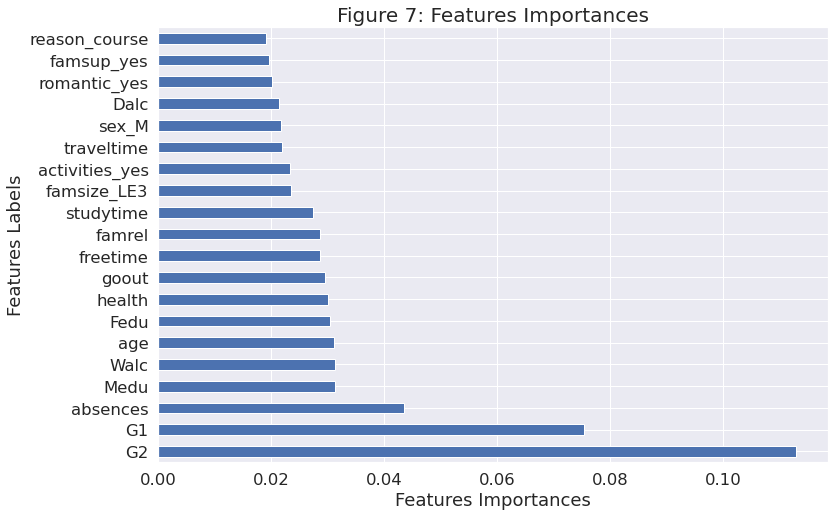

In [199]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier(n_estimators=100)
model.fit(X,y)
#plot graph of feature importances for better visualization
plt.figure(figsize=(12, 8))
plt.title('Figure 7: Features Importances', fontsize=20)
plt.ylabel('Features Labels')
plt.xlabel('Features Importances')
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

## Regression Algorithms:

### Partial Least Square Regression (PLS)

Figure 8 shows the validation Curve for PLS regression on Forward Selected Features. From the fig. 8, the number of regression components to be used is 6 (at the flatted point of the validation of the accuracy).

#### IV.14.1.1. Partial Least Square Regression with Forward selected features data

In [248]:
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import make_scorer

pls = PLSRegression(n_components=6)

pls_r2 = cross_val_score(pls, X_train_forward_selected_features, y_train, cv=10, scoring='r2')
pls_mse = cross_val_score(pls, X_train_forward_selected_features, y_train, cv=10, scoring= make_scorer(mean_squared_error)) 

In [249]:
print('Validation R2 average for using PLS on forward selected features '+ str(np.mean(pls_r2)))

Validation R2 average for using PLS on forward selected features 0.8429343620491305


In [251]:
print('Validation MSE average for using PLS on forward selected features '+ str(np.mean(pls_mse)))

Validation MSE average for using PLS on forward selected features 3.1107850800464387


PLS Regression components were decided to be 6 based on the following plot, Using PLS regression as an estimator and get the best validation accuracy. From the plot, after number of components reaches 6, the validation and training curve flatten.

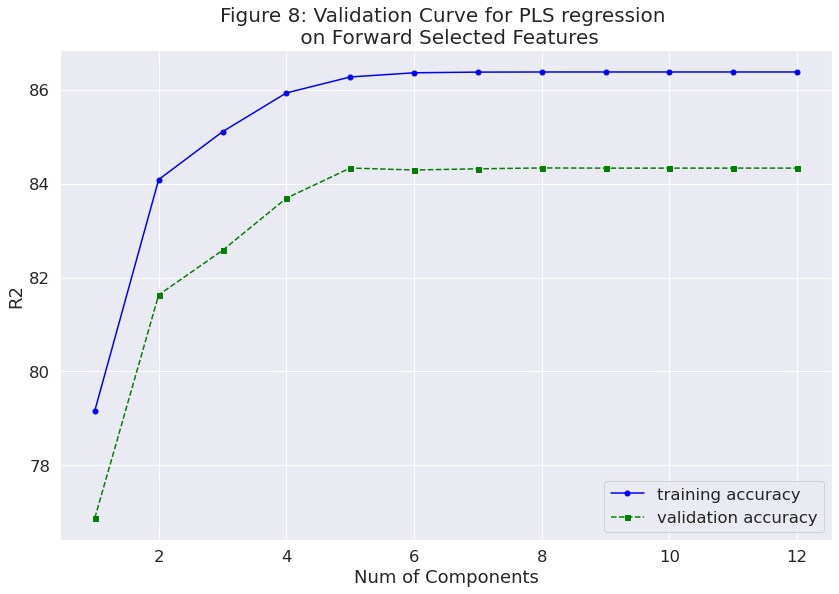

In [252]:
from sklearn.model_selection import validation_curve

pls = PLSRegression()

# Validation curve for parameter estimation
param_range = list(range(1,13))

train_scores, test_scores = validation_curve(
                estimator=pls, 
                X=X_train_forward_selected_features, 
                y=y_train, 
                param_name='n_components',
                param_range=param_range,
                cv=10)

# Calculate validation curves for training and test sets
train_mean = np.mean(train_scores, axis=1)*100
train_std = np.std(train_scores, axis=1)*100
test_mean = np.mean(test_scores, axis=1)*100
test_std = np.std(test_scores, axis=1)*100

plt.figure(figsize=(12, 8))

plt.plot(param_range, train_mean, 
         color='blue', marker='o', 
         markersize=5, label='training accuracy')

plt.plot(param_range, test_mean, 
         color='green', linestyle='--', 
         marker='s', markersize=5, 
         label='validation accuracy')

plt.legend()
plt.xlabel('Num of Components')
plt.ylabel('R2')
plt.tight_layout()
plt.title("Figure 8: Validation Curve for PLS regression \n on Forward Selected Features", fontsize=20)
plt.show()

####  Training of PLS

We train the model on the X_train_forward_selected_features, 

In [253]:
pls.fit(X_train_forward_selected_features, y_train)
y_pred = pls.predict(X_test_forward_selected_features)

#### Scatter Graphs for Prediction vs Actual using PLS on Forward Selected features
Fig.9 shows that the prediction based on the model and the real data are relatively closer. The $R^2$ score is 0.766.

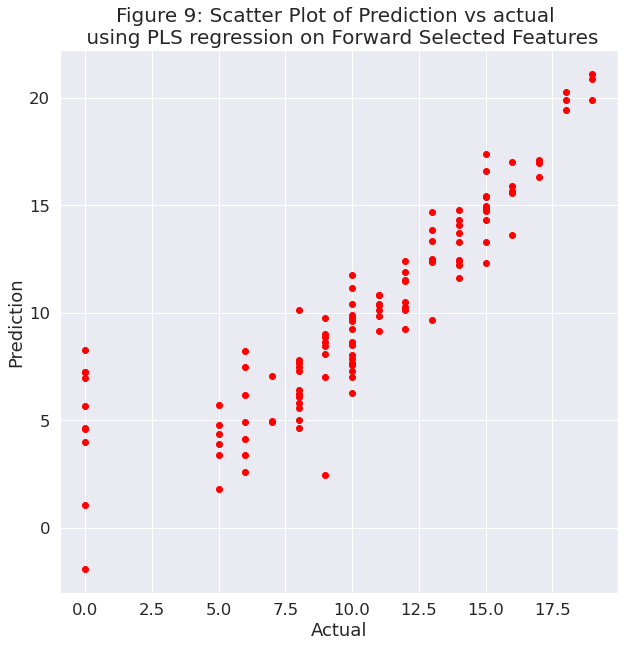

In [255]:
plt.figure(figsize=(10, 10))
plt.scatter(y_test, y_pred, color = "red")
plt.title("Figure 9: Scatter Plot of Prediction vs actual \n using PLS regression on Forward Selected Features", fontsize=20)
plt.xlabel("Actual")
plt.ylabel("Prediction")
plt.show()

In [256]:
print(pls.score(X_test_forward_selected_features, y_test))

0.7587037084655428


#### Partial Least Square Regression with backward selected features data

Number of components is decided to be 5 based on the optimal $R^2$ score on training and validation data as shown in fig.10.

In [257]:
pls = PLSRegression(n_components=5)

pls_r2 = cross_val_score(pls, X_train_backward_selected_features, y_train, cv=10, scoring='r2')
pls_mse = cross_val_score(pls, X_train_backward_selected_features, y_train, cv=10, scoring= make_scorer(mean_squared_error)) 

In [258]:
print('Validation R2 averge for using PLS on backward selected features '+str(np.mean(pls_r2)))
print('Validation MSE average for using PLS on backward selected features '+ str(np.mean(pls_mse)))

Validation R2 averge for using PLS on backward selected features 0.8429651279757728
Validation MSE average for using PLS on backward selected features 3.1091512827784813


PLS gives relatively higher R2 scores on test data when we use the forward selected features comparing to using backward selected features as training data.

#### Training PLS on backward selected features

In [259]:
pls.fit(X_train_backward_selected_features, y_train)
y_pred = pls.predict(X_test_backward_selected_features)

In [260]:
score = pls.score(X_test_backward_selected_features, y_test)
print('Testing PLS score on backward selected features '+ str(score))
#Save the score to the result dictionary
saved_results_r2['PLS'] = score

Testing PLS score on backward selected features 0.7812965448665099


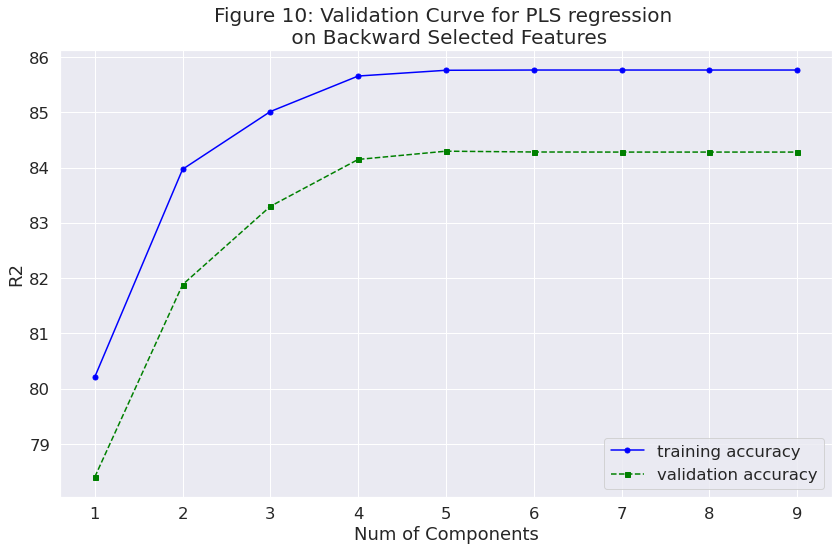

In [261]:
from sklearn.model_selection import validation_curve

pls = PLSRegression()

# Validation curve for parameter estimation
param_range = list(range(1,10))

train_scores, test_scores = validation_curve(
                estimator=pls, 
                X=X_train_backward_selected_features, 
                y=y_train, 
                param_name='n_components',
                param_range=param_range,
                cv=10)

# Calculate validation curves for training and test sets
train_mean = np.mean(train_scores, axis=1)*100
train_std = np.std(train_scores, axis=1)*100
test_mean = np.mean(test_scores, axis=1)*100
test_std = np.std(test_scores, axis=1)*100

plt.figure(figsize=(12, 8))

plt.plot(param_range, train_mean, 
         color='blue', marker='o', 
         markersize=5, label='training accuracy')

plt.plot(param_range, test_mean, 
         color='green', linestyle='--', 
         marker='s', markersize=5, 
         label='validation accuracy')

plt.legend()
plt.xlabel('Num of Components')
plt.ylabel('R2')
plt.title("Figure 10: Validation Curve for PLS regression \n on Backward Selected Features", fontsize=20)
plt.tight_layout()
plt.show()

### Ridge Regression

#### Ridge Regression on forward selected features

In [212]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=0.01)
ridge_r2 = cross_val_score(ridge, X_train_forward_selected_features, y_train, cv=10, scoring='r2')
ridge_mse = cross_val_score(ridge, X_train_forward_selected_features, y_train, cv=10, scoring= make_scorer(mean_squared_error)) 

In [262]:
print('Validation R2 average for using Ridge regression on forward selected features '+ str(np.mean(ridge_r2)))
print('Validation MSE average for using Ridge regression on forward selected features '+ str(np.mean(ridge_mse)))

Validation R2 average for using Ridge regression on forward selected features 0.8428034737508195
Validation MSE average for using Ridge regression on forward selected features 3.1169902020826985


#### Ridge Regression on backward selected features 

In [263]:
ridge = Ridge(alpha=0.01)
ridge_r2 = cross_val_score(ridge, X_train_backward_selected_features, y_train, cv=10, scoring='r2')
ridge_mse = cross_val_score(ridge, X_train_backward_selected_features, y_train, cv=10, scoring= make_scorer(mean_squared_error)) 

In [265]:
print('Validation R2 average for using Ridge regression on backward selected features '+ str(np.mean(ridge_r2)))
print('Validation MSE average for using Ridge regression on backward selected features '+ str(np.mean(ridge_mse)))

Validation R2 average for using Ridge regression on backward selected features 0.8428034737508195
Validation MSE average for using Ridge regression on backward selected features 3.1169902020826985


Using ridge regression on backward selected features gives slightly higher R2 than using ridge on forward selected features. So, we used it for training ridge regression.

In [266]:
ridge = Ridge(alpha=0.01)
ridge.fit(X_train_forward_selected_features, y_train)
score = ridge.score(X_test_forward_selected_features, y_test)
print('Best ridge regression score on test data ' + str(score))
#Save the score to the results dictionary
saved_results_r2['Ridge'] = score

Best ridge regression score on test data 0.7774667805064169


As shown in the next cell, There are no zero coefficient when using ridge regression

In [267]:
ridge.coef_

array([-0.14111955,  0.33449974,  0.17707001, -0.13700221,  0.43326351,
        0.7400074 ,  3.55746441,  0.15941667,  0.27988831,  0.09799072,
        0.11757277, -0.23307826, -0.06814845, -0.16910114, -0.06146422,
       -0.18238672,  0.09192528, -0.22388877,  0.14852941,  0.01944424,
        0.15308966])

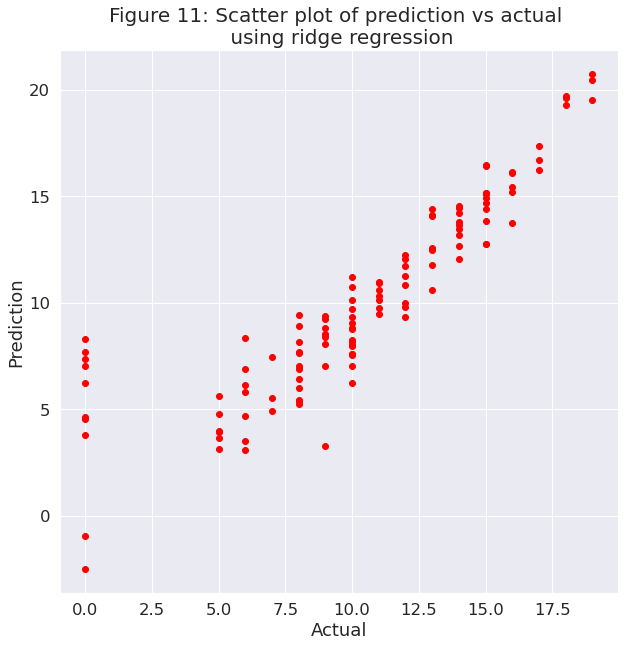

In [268]:
y_pred = ridge.predict(X_test_forward_selected_features)
plt.figure(figsize=(10, 10))
plt.scatter(y_test, y_pred, color = "red")
plt.title("Figure 11: Scatter plot of prediction vs actual \n using ridge regression", fontsize=20)
plt.xlabel("Actual")
plt.ylabel("Prediction")
plt.show()

### Lasso Regression

#### Lasso Regression on forward selected features

In [269]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.1, max_iter = 10000)  
lasso_r2 = cross_val_score(lasso, X_train_forward_selected_features, y_train, cv=10, scoring='r2')
lasso_mse = cross_val_score(lasso, X_train_forward_selected_features, y_train, cv=10, scoring= make_scorer(mean_squared_error)) 

In [270]:
print('Validation R2 average for using Lasso regression on forward selected features '+ str(np.mean(lasso_r2)))
print('Validation MSE average for using Lasso regression on forward selected features '+ str(np.mean(lasso_mse)))

Validation R2 average for using Lasso regression on forward selected features 0.8375819873020628
Validation MSE average for using Lasso regression on forward selected features 3.2118833572809917


#### Lasso Regression on backward selected features

In [271]:
lasso = Lasso(alpha=0.1, max_iter = 10000)  
lasso_r2 = cross_val_score(lasso, X_train_backward_selected_features, y_train, cv=10, scoring='r2')
lasso_mse = cross_val_score(lasso, X_train_backward_selected_features, y_train, cv=10, scoring= make_scorer(mean_squared_error)) 

In [272]:
print('Validation R2 average for using Lasso regression on backward selected features '+ str(np.mean(lasso_r2)))
print('Validation MSE average for using Lasso regression on backward selected features '+ str(np.mean(lasso_mse)))

Validation R2 average for using Lasso regression on backward selected features 0.8369102223774684
Validation MSE average for using Lasso regression on backward selected features 3.2247756130766363


Using Lasso with forward selected features gives slightly better R2 score than backward selected features. So, we used forward for training Lasso regression

In [273]:
lasso.fit(X_train_forward_selected_features, y_train)
score = lasso.score(X_test_forward_selected_features, y_test)
print('Best lasso regression score on test data ' + str(score))

#Save the score to the results dictionary
saved_results_r2['Lasso'] = score

Best lasso regression score on test data 0.7999199578554859


Lasso shows 7 zeros coefficients and the features that were assigned zero coefficents are as in the following, We called those features that are not used in modeling 'muted features'.

In [274]:
print('Lasso Coefficents', lasso.coef_)
#lasso_muted_features = [forward_selected_features_names[coef] if coef == 0 for coef in lasso.coef_]
lasso_muted_features = []
idx = 0
for coef in lasso.coef_:
    if coef == 0:
        lasso_muted_features.append(forward_selected_features_names[idx])
    idx += 1
print('Lasso muted features', lasso_muted_features)

Lasso Coefficents [-8.52570396e-02  2.36553327e-01  1.35120155e-02 -0.00000000e+00
  2.44425075e-01  5.78351093e-01  3.55575070e+00  0.00000000e+00
  1.33833672e-01  3.12220539e-03  2.67811139e-02 -1.11699354e-01
 -0.00000000e+00 -1.14033333e-01 -0.00000000e+00 -9.88139268e-02
  0.00000000e+00 -1.67068654e-01  0.00000000e+00  0.00000000e+00
  1.14892767e-01]
Lasso muted features ['Dalc', 'school_MS', 'higher_yes', 'Mjob_teacher', 'Fjob_teacher', 'reason_home', 'reason_other']


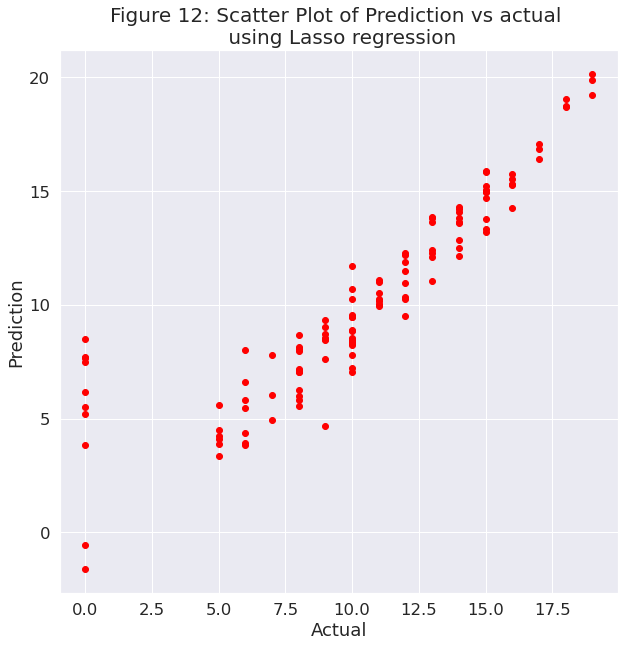

In [275]:
y_pred = lasso.predict(X_test_forward_selected_features)
plt.figure(figsize=(10, 10))
plt.scatter(y_test, y_pred, color = "red")
plt.title("Figure 12: Scatter Plot of Prediction vs actual \n using Lasso regression", fontsize=20)
plt.xlabel("Actual")
plt.ylabel("Prediction")
plt.show()

### Elastic Net Regression

#### Elastic Net regression using forward selected features

In [226]:
from sklearn.linear_model import ElasticNet
elastic = ElasticNet(alpha=0.01, l1_ratio=0.5, max_iter = 100)
elastic_r2 = cross_val_score(elastic, X_train_forward_selected_features, y_train, cv=10, scoring='r2')
elastic_mse = cross_val_score(elastic, X_train_forward_selected_features, y_train, cv=10, scoring= make_scorer(mean_squared_error)) 

In [276]:
print('Validation R2 average for using Elastic net regression on forward selected features '+ str(np.mean(elastic_r2)))
print('Validation MSE average for using Elastic net regression on forward selected features '+ str(np.mean(elastic_mse)))

Validation R2 average for using Elastic net regression on forward selected features 0.8427158609243568
Validation MSE average for using Elastic net regression on forward selected features 3.11791854928766


#### Elastic Net regression using forward selected features

In [277]:
elastic_r2 = cross_val_score(elastic, X_train_backward_selected_features, y_train, cv=10, scoring='r2')
elastic_mse = cross_val_score(elastic, X_train_backward_selected_features, y_train, cv=10, scoring= make_scorer(mean_squared_error)) 

In [278]:
print('Validation R2 average for using Elastic net regression on backward selected features '+ str(np.mean(elastic_r2)))
print('Validation MSE average for using Elastic net regression on backward selected features '+ str(np.mean(elastic_mse)))

Validation R2 average for using Elastic net regression on backward selected features 0.8427158609243568
Validation MSE average for using Elastic net regression on backward selected features 3.11791854928766


Elastic net regression gives slightly higher score on forward selected features. So, forward selected features were used for training Elastic net

#### Training Elastic Net regression on forward selected features

In [279]:
elastic.fit(X_train_forward_selected_features, y_train)
score = elastic.score(X_test_forward_selected_features, y_test)
print('Best elastic net regression score on test data ' + str(score))

#Save the score to the results dictionary
saved_results_r2['Elastic Net'] = score

Best elastic net regression score on test data 0.7796918612142189


Elastic Net shows only one zero coefficient

In [280]:
print('Elastic Net Coefficents', elastic.coef_)
#lasso_muted_features = [forward_selected_features_names[coef] if coef == 0 for coef in lasso.coef_]
elastic_muted_features = []
idx = 0
for coef in elastic.coef_:
    if coef == 0:
        elastic_muted_features.append(forward_selected_features_names[idx])
    idx += 1
print('Elastic Net muted features', elastic_muted_features)

Elastic Net Coefficents [-0.14082278  0.32740024  0.16179784 -0.1214087   0.41792485  0.76938178
  3.50507217  0.14865198  0.2735164   0.08970137  0.11526739 -0.22534169
 -0.05672475 -0.17019116 -0.05874692 -0.17603062  0.05659844 -0.24104478
  0.12504654 -0.          0.15271677]
Elastic Net muted features ['reason_other']


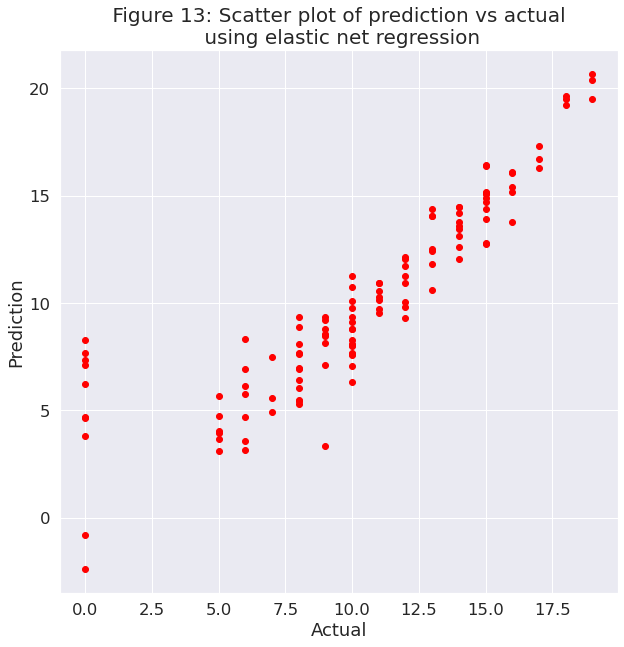

In [281]:
y_pred = elastic.predict(X_test_forward_selected_features)
plt.figure(figsize=(10, 10))
plt.scatter(y_test, y_pred, color = "red")
plt.title(" Figure 13: Scatter plot of prediction vs actual \n using elastic net regression", fontsize=20)
plt.xlabel("Actual")
plt.ylabel("Prediction")
plt.show()

### Random Forest Regression

#### Random Forest Regressor on forward selected features

In [282]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor(n_estimators=400, 
                               criterion='mse',
                               random_state=1, 
                               n_jobs=-1)
forest_r2 = cross_val_score(forest, X_train_forward_selected_features, y_train, cv=20, scoring='r2')
forest_mse = cross_val_score(forest, X_train_forward_selected_features, y_train, cv=20, scoring= make_scorer(mean_squared_error)) 

We estimate the number of estimators hyperparameter by using grid search that gives the best validation score. Seven n-estimater from 100 to 1500 were pre selected for the GridSearchCV funtion. 

In [283]:
from sklearn.model_selection import GridSearchCV

estimator = RandomForestRegressor()
para_grids = {
            "n_estimators" : [100, 200, 300, 400 ,500, 1000, 1500]
        }
grid = GridSearchCV(estimator, para_grids, scoring = 'r2',cv=10,n_jobs=-1, iid=False)
grid.fit(X_train_std, y_train)
print (grid.best_score_, grid.best_params_)

0.8838558191007291 {'n_estimators': 400}


In [284]:
print('Validation R2 average for using Random Forest regression on forward selected features '+ str(np.mean(forest_r2)))
print('Validation MSE average for using Random Forest regression regression on forward selected features '+ str(np.mean(forest_mse)))

Validation R2 average for using Random Forest regression on forward selected features 0.8926458381084181
Validation MSE average for using Random Forest regression regression on forward selected features 1.9760714680631875


#### Training the Random Forest Regressor on forward selected features

In [285]:
forest.fit(X_train_forward_selected_features, y_train)
score = forest.score(X_test_forward_selected_features, y_test)
print('Best Random Forest regression score on test data ' + str(score))

#Save the score to the results dictionary
saved_results_r2['Random Forest'] = score

Best Random Forest regression score on test data 0.8453352799096014


#### Scatter plot of the actual data vs the predicted data

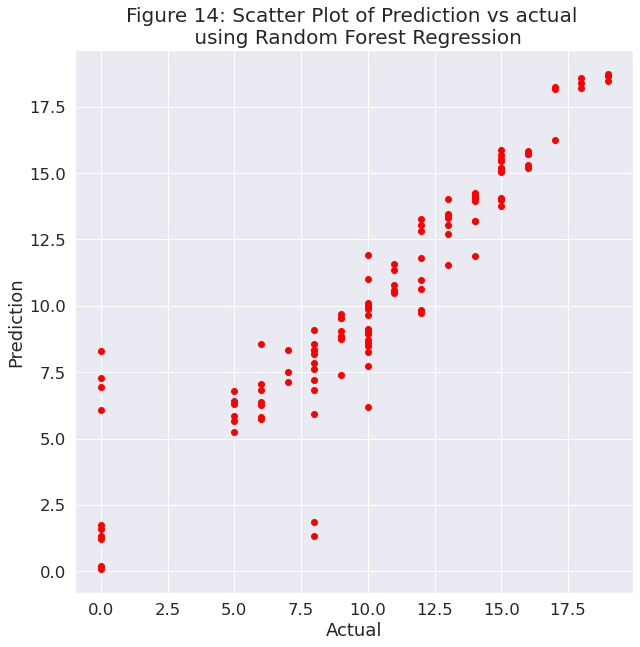

In [293]:
y_pred = forest.predict(X_test_forward_selected_features)
plt.figure(figsize=(10, 10))
plt.scatter(y_test, y_pred, color = "red")
plt.title("Figure 14: Scatter Plot of Prediction vs actual \n using Random Forest Regression", fontsize=20)
plt.xlabel("Actual")
plt.ylabel("Prediction")
plt.show()

#### Using random forest regression with KBest selected features

Below we have used select k best for feature selection. The scores of the features are shown in the score table. By referencing the table we see that 22 columns have a score greater than zero. So we decided to use the varaibles with score of atleast 1.

In [287]:
from sklearn.feature_selection import SelectKBest, f_regression
selector = SelectKBest(f_regression, k=22).fit(X_train_std, y_train)
kbest_features_train = selector.transform(X_train_std)
kbest_features_test = selector.transform(X_test_std)
print(kbest_features_train.shape)

(276, 22)


In [288]:
#Calculate the score of features
selected_features_df = pd.DataFrame({'Feature':list(X_train.columns),
                                     'Scores':selector.scores_})
selected_features_df.sort_values(by='Scores', ascending=False)

,Feature,Scores
14,G2,1310.693812
13,G1,440.445682
5,failures,44.124162
25,higher_yes,16.595315
1,Medu,9.461505
22,paid_yes,7.715219
27,romantic_yes,5.119667
29,Mjob_health,5.063262
0,age,4.792613
8,goout,4.728930


We train random forest regression on the KBest selected features and calculating the *R^2* score. Random forest gives the best score we measured in this study which is 0.8703455517848423 on test data and 0.879545525972101 on validation data.

In [240]:
rf = RandomForestRegressor(n_estimators = 400, random_state = 42)
forest_r2 = cross_val_score(forest, kbest_features_train, y_train, cv=20, scoring='r2')
forest_mse = cross_val_score(forest, kbest_features_train, y_train, cv=20, scoring= make_scorer(mean_squared_error)) 

In [289]:
print('Validation R2 average for using Random Forest regression on KBest selected features '+ str(np.mean(forest_r2)))
print('Validation MSE average for using Random Forest regression regression on KBest selected features '+ str(np.mean(forest_mse)))

Validation R2 average for using Random Forest regression on KBest selected features 0.8926458381084181
Validation MSE average for using Random Forest regression regression on KBest selected features 1.9760714680631875


In [290]:
#Training the random forest on Kbest features
rf.fit(kbest_features_train, y_train)
y_pred = rf.predict(kbest_features_test)
score = rf.score(kbest_features_test, y_test)
print('Random Forest regression score on test data with KBest selected features ' + str(score))

#Save the score to the results dictionary
saved_results_r2['Random Forest with KBest'] = score

Random Forest regression score on test data with KBest selected features 0.8710430256105279


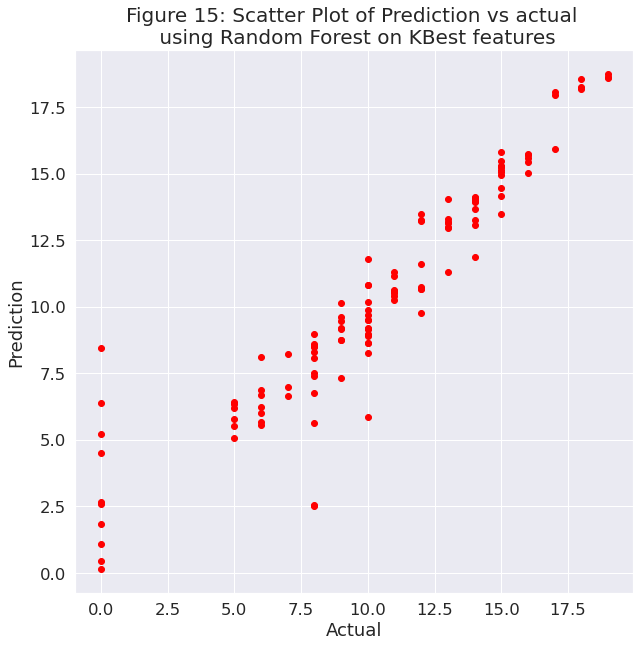

In [291]:
y_pred = rf.predict(kbest_features_test)
plt.figure(figsize=(10, 10))
plt.scatter(y_test, y_pred, color = "red")
plt.xlabel("Actual")
plt.ylabel("Prediction")
plt.title("Figure 15: Scatter Plot of Prediction vs actual \n using Random Forest on KBest features", fontsize=20)
plt.show()

By combining and comparing the results of all the used regression methods, Random Forest Regression on KBest features gives the best $R^2$ score as shown in fig.16.

# Disscusion

The outcomes show that at all regression models, the predictions and the observatons are close in the mark ranging from 5 to 20. This outcome is similar with Cortez and Silva, 2008. This study shows that G1, G2, failures, age and health are amongst the most important independent varibles to predict the grades of students which is similar to the study conducted by Cortez and Silva, 2008. 

# Conclusion

From the above scores, Random Forest gives the best predictions with $R^2$ of 0.87 on test data as shown in fig.16. We can get into the conclusion that student’s performance is greatly affected by past grades (G1 & G2). Also, features like (age, health, etc.) affected the student’s performance. More research is needed to predict the G1 and G2 grades based on those features. Further research can be done like tuning the hyperparameters using grid search for other regressions like elastic net. 

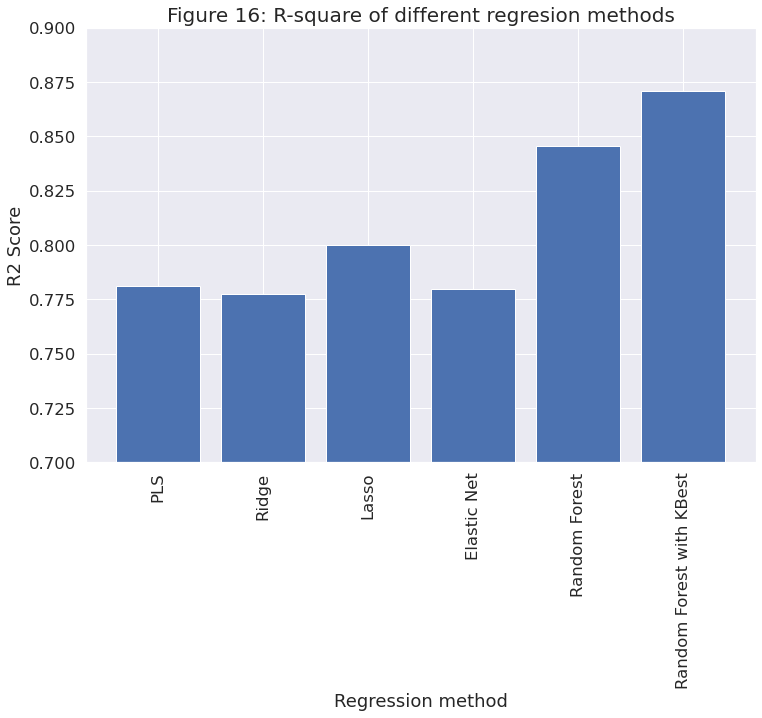

In [292]:
lists = saved_results_r2.items()
plt.figure(figsize=(12, 8))
x, y = zip(*lists)
plt.title("Figure 16: R-square of different regresion methods", fontsize=20)
plt.xlabel('Regression method')
plt.ylim(0.7, 0.9)
plt.ylabel('R2 Score')
plt.bar(x, y)
plt.xticks(rotation='vertical')
plt.show()

# References

Cortez, P. Student Performance Data Set, https://archive.ics.uci.edu/ml/datasets/student+performance.

Raschka & Mirjalili, 2019, Python Machine Learning, 3rd edition

Cortez, P. and A. Silva, Using data mining to predict secondary school student performance. 2008.

Pardos Z,; Heffernan N.; Anderson B.; and Heffernan C., 2006. Using Fine-Grained Skill Models to Fit Student Performance with Bayesian Networks. In Proc. Of 8th Int. Conf. on Intelligent Tutoring Systems. Taiwan.

Kotsiantis S.; Pierrakeas C.; and Pintelas P., 2004. Predicting Students’ Performance in Distance Learning using Machine Learning Techniques. Applied Artificial Intelligence (AAI), 18, no.5, 411-426.

https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html

https://hackernoon.com/what-is-one-hot-encoding-why-and-when-do-you-have-to-use-it-e3c6186d008f

https://www.globalpartnership.org/benefits-of-education

https://worldtop20.org/the-worlds-best-20-education-systems-rankings-third-quarter-report

https://stats.stackexchange.com/questions/69157/why-do-we-need-to-normalize-data-before-principal-component-analysis-pca

https://archive.ics.uci.edu/ml/datasets/student+performance

https://www.researchgate.net/post/Is_it_necessary_to_normalize_data_before_performing_principle_component_analysis

https://sebastianraschka.com/faq/docs/scale-training-test.html

https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.f_regression.html

https://stackoverflow.com/questions/43675665/when-scale-the-data-why-the-train-dataset-use-fit-and-transform-but-the-te

https://www.geeksforgeeks.org/lasso-vs-ridge-vs-elastic-net-ml/

http://rasbt.github.io/mlxtend/user_guide/feature_selection/SequentialFeatureSelector/

https://www.researchgate.net/post/Is_it_advisable_to_use_a_dummy_variable_for_sex_male_female_in_my_regression_analysis

https://bookdown.org/ripberjt/labbook/categorical-explanatory-variables-dummy-variables-and-interactions.html

https://github.com/bhattbhavesh91/GA_Sessions/blob/master/ga_dsmp_5jan2019/16_feature_selection.ipynb

#  Appendix 1: Varibles in datasets

1-	school - student's school (binary: "GP" - Gabriel Pereira or "MS" - Mousinho da Silveira)

2-	sex - student's sex (binary: "F" - female or "M" - male)

3-	age - student's age (numeric: from 15 to 22)

4-	address - student's home address type (binary: "U" - urban or "R" - rural)

5-	famsize - family size (binary: "LE3" - less or equal to 3 or "GT3" - greater than 3)

6-	Pstatus - parent's cohabitation status (binary: "T" - living together or "A" - apart)

7-	Medu - mother's education (numeric: 0 - none,  1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)

8-	Fedu - father's education (numeric: 0 - none,  1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)

9-	Mjob - mother's job (nominal: "teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other")

10-	 Fjob - father's job (nominal: "teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other")

11-	reason - reason to choose this school (nominal: close to "home", school "reputation", "course" preference or "other")

12-	guardian - student's guardian (nominal: "mother", "father" or "other")

13-	 traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)

14-	studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)

15-	failures - number of past class failures (numeric: n if 1<=n<3, else 4)

16-	schoolsup - extra educational support (binary: yes or no)

17-	famsup - family educational support (binary: yes or no)

18-	paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)

19-	activities - extra-curricular activities (binary: yes or no)

20-	nursery - attended nursery school (binary: yes or no)

21-	higher - wants to take higher education (binary: yes or no)

22-	internet - Internet access at home (binary: yes or no)

23-	romantic - with a romantic relationship (binary: yes or no)

24-	famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)

25-	freetime - free time after school (numeric: from 1 - very low to 5 - very high)

26-	goout - going out with friends (numeric: from 1 - very low to 5 - very high)

27-	Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)

28-	Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)

29-	health - current health status (numeric: from 1 - very bad to 5 - very good)

30-	absences - number of school absences (numeric: from 0 to 93)

31-	G1 - first period grade (numeric: from 0 to 20)

32-	G2 - second period grade (numeric: from 0 to 20)

33-	G3 - final grade (numeric: from 0 to 20, target feature)
